The k-means algorithm is one of the most popular clustering algorithms. This algorithm is
used to divide the input data into k subgroups using various attributes of the data.
Grouping is achieved using an optimization technique where we try to minimize the sum of
squares of distances between the datapoints and the corresponding centroid of the cluster.
If you need a quick refresher, you can learn more about k-means at
http://www.onmyphd.com/?p=k-means.clustering&ckattempt=1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

import utilities

In [2]:
# load the input data
data = utilities.load_data('data_multivar.txt')
num_clusters = 4

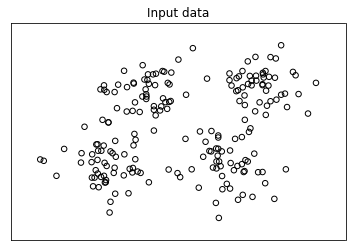

In [3]:
# show the input data

plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o',
           facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()                                        

In [4]:
# train the model
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

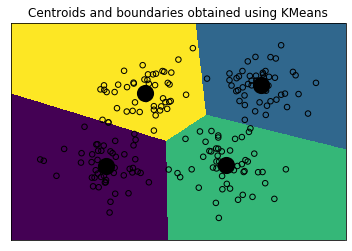

In [5]:
# visualize the boundaries of the trained data
step_size = 0.01

# plot the boundaries
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                 np.arange(y_min, y_max, step_size))

# predict labels for all points in the mesh
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])

# plot the results
predicted_labels = predicted_labels.reshape(x_values.shape)
plt.figure()
plt.clf()
plt.imshow(predicted_labels, interpolation='nearest',
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
           aspect='auto', origin='lower')

plt.scatter(data[:,0], data[:,1], marker='o',
            facecolors='none', edgecolors='k', s=30)

# Overlay the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3,
            color='k', zorder=10, facecolors='black')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1

plt.title('Centroids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()